In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv('IMB881-main-Order.csv')

In [3]:
df.head()

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr,Unnamed: 12,Unnamed: 13
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,11.5425,NaN,NaN
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.00,10.5300,NaN,NaN
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.00,7.9200,NaN,NaN
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.00,7.9200,NaN,NaN
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.00,10.5300,NaN,NaN


In [4]:
df.columns

Index(['CustomerCode', 'CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [5]:
df.shape

(13135, 14)

In [6]:
df = df.drop_duplicates()
df.drop_duplicates(inplace=True)
df.shape

(11151, 14)

###### Making Group for CustomerCode

In [6]:
customer_code_mapping = {
    'A': ['A-9', 'A-6', 'A-11'],
    'B': ['B-3', 'B-2', 'B-4'],
    'C':['C-1', 'CC', 'RC', 'PC', 'C-2', 'C-3', 'CTS'],
    'E': ['E-2'],
    'F': ['F-1', 'F-2', 'F-6'],
    'G': ['G-1', 'G-4',],
    'H':['H-1', 'H-2'],
    'I': ['I-2'],
    'K':['K-2','K-3'],
    'L':['JL', 'L-2', 'L-5', 'L-4', 'L-3'],
    'M':['M-1', 'M-2'],
    'N':['N-1'],
    'P':['P-5', 'P-4'],
    'R':['R-4'],
    'S':['S-3','S-2'],
    'T':['T-6','T-9','T-4','T-4','T-5','T-2'],
    'V':['V-1']
}
def assign_main_customer_code(customer_code):
    for group, values in customer_code_mapping.items():
        if customer_code in values:
            return group
    return customer_code

# Apply the function to create a new column 'QualityGroup'
df['MainCustomerCode'] = df['CustomerCode'].apply(assign_main_customer_code)

# Create a new dataset with the relevant columns
grouped_CustomerCode_data = df[['CustomerCode', 'CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode']].copy()

In [7]:
## Showing the unique value of each column

selected_columns = ['CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode']

for column in selected_columns:
    unique_values = grouped_CustomerCode_data[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = grouped_CustomerCode_data[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


CountryName (14 unique values):
['USA' 'ITALY' 'UK' 'AUSTRALIA' 'SOUTH AFRICA' 'BELGIUM' 'BRAZIL' 'CHINA'
 'CANADA' 'ROMANIA' 'ISRAEL' 'LEBANON' 'INDIA' 'UAE']

QtyRequired (297 unique values):
[   6    7    5   35    4    2    3   12    8    9   10   16   13   14
   11    1   21   20   15   23   30   38   50  128   33   40   19  300
   75   25   22   24   39  150   17  100   46   58   18   55  120   90
   70   85   80   63   45   60   41   29   28   32  203   44   65   64
  125  144   37   31  285  304  104   26   27  310   95   42  140   34
   98   59   48  190   36   53  113  315  110   43  200  460  350  296
  205 1120  250  130   49   56   61   51  115  180  240  195   54   78
  102   76  175   57  171  210  147   52  156  230  160  692  217   47
  225  179  274  309 1500  750  600  450  400   66  112   79  282   91
  330  265  365  283  275   88  800   62  850  380  565  322  262  472
  325   74  135   71  480  320  295   69   67 1200 1080  106 1260  390
  360  900  840  690  645

##### Decresing the unique value  for Columns: Quality, Color, Design Name

In [8]:
# Function to extract the first two words from QualityName
def extract_primary_quality(quality_name):
    # Split the quality name by whitespaces
    words = quality_name.split()
    
    # Take the first two words
    if len(words) >= 2:
        return ' '.join(words[:2])
    else:
        return quality_name

# Apply the function to create a new column 'MainQuality'
df['MainQuality'] = df['QualityName'].apply(extract_primary_quality)

# Create a new dataset with the relevant columns
new_dataset_quality = df[['CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode', 'MainQuality']].copy()

In [9]:
new_dataset_quality.to_csv('MainQuality-orderonly.csv', index=False)
df1=pd.read_csv('MainQuality-orderonly.csv')

In [10]:
## Double check the unique values in Quality column *** New column: MainQuality

selected_columns = ['MainQuality']

for column in selected_columns:
    unique_values = df1[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = df1[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)

MainQuality (92 unique values):
['TUFTED 30C' 'TUFTED 60C' 'SHAGGY 0C' 'TUFTED 60C+VISC' 'TUFTED 60C+10C'
 'FLATWOVEN JUTE+COTTON' 'HANDWOVEN 8C' 'GUN TUFTED' 'INDO-TIBBETAN 10/40'
 'FLATWOVEN JUTE' 'FLATWOVEN SEAGRASS+COTTON' 'D.B. 60C' 'D.B. VISCOSE'
 'D.B. LILEN' 'JACQUARD 60C' 'KNOTTED 3/12' 'KNOTTED 3/25' 'D.B. LEFA'
 'SHAGGY 00C' 'SHAGGY 30C' 'FLATWOVEN PET' 'SHAGGY 60C'
 'FLATWOVEN 30C/45C' 'KNOTTED 3/18' 'FLATWOVEN 60C' 'HANDLOOM 60C+VISC'
 'HANDLOOM VISC' 'TUFTED VISCOSE' 'FLATWOVEN COTTON' 'FLATWOVEN CHINDI'
 'FLATWOVEN 60C+10C' 'D.B. 60C+LUREX' 'FLATWOVEN PVC'
 'FLATWOVEN 60C+LUREX' 'FLATWOVEN 60C+COTTON' 'INDO-TIBBETAN 8/40'
 'D.B. 60C+VISCOSE' 'KNOTTED 3/22' 'TUFTED 10C' 'TUFTED 60C+8C'
 'HANDLOOM 60C' 'SHAGGY 8C' 'KNOTTED 4/25' 'KNOTTED 6/36' 'JACQUARD DP+8C'
 'D.B. VISC' 'D.B. PET' 'SHAGGY 60C+100C' 'FLATWOVEN COTTON+LUREX'
 'KNOTTED 4/30' 'FLATWOVEN 10C+COTTON' 'SHAGGY 60C+JUTE' 'JACQUARD SARI'
 'FLATWOVEN 60C+10C+LUREX' 'FLATWOVEN 60C+JUTE' 'TUFTED 60C+30C'
 'JACQUARD 

In [16]:
blue_values = df1[df1['MainQuality'].str.contains('HANDLOOM', case=False)]['MainQuality'].unique()
print(blue_values)

['HANDLOOM 60C+VISC' 'HANDLOOM VISC' 'HANDLOOM 60C' 'HANDLOOM 60C+JUTE'
 'HANDLOOM TENCIL']


In [23]:
Quality_Names = {
    'TUFTED': ['TUFTED 30C', 'TUFTED 60C', 'TUFTED 60C+VISC', 'TUFTED 60C+10C', 'GUN TUFTED',
 'TUFTED VISCOSE', 'TUFTED 10C', 'TUFTED 60C+8C', 'TUFTED 60C+30C','TUFTED 52C', 'TUFTED 3/8', 'TUFTED 52C+52C',
               'TBL TUFTED'],
    'SHAGGY': ['SHAGGY 0C', 'SHAGGY 00C', 'SHAGGY 30C', 'SHAGGY 60C' ,'SHAGGY 8C','SHAGGY 60C+100C',
               'SHAGGY 60C+JUTE' ,'SHAGGY 60C+VISC','SHAGGY 60C+10C+LUREX' ,'SHAGGY 60C+DP' ,'SHAGGY 60C+10C'],

    'FLATWOVEN':['FLATWOVEN JUTE+COTTON' ,'FLATWOVEN JUTE', 'FLATWOVEN SEAGRASS+COTTON','FLATWOVEN PET' ,
                 'FLATWOVEN 30C/45C', 'FLATWOVEN 60C', 'FLATWOVEN COTTON','FLATWOVEN CHINDI', 'FLATWOVEN 60C+10C',
                 'FLATWOVEN PVC','FLATWOVEN 60C+LUREX' ,'FLATWOVEN 60C+COTTON', 'FLATWOVEN COTTON+LUREX',
                 'FLATWOVEN 10C+COTTON', 'FLATWOVEN 60C+10C+LUREX' ,'FLATWOVEN 60C+JUTE','FLATWOVEN COTTON+10C',
                 'FLATWOVEN 8C+COTTON', 'FLATWOVEN 60C+COTTON+LUREX','FLATWOVEN 60C+10C+LUREX+COTTON' ,
                 'FLATWOVEN COTTON+8C','FLATWOVEN 60C+10C+COTTON', 'FLATWOVEN 30C' ,'FLATWOVEN COTTON+60C+8C',
                 'FLATWOVEN COTTON+60C' ,'FLATWOVEN 45C', 'FLATWOVEN COTTON+JUTE','FLATWOVEN 30C+30C' ,
                 'FLATWOVEN COTTON+CHINDI' ,'FLATWOVEN JUTE+LATHER', 'FLATWOVEN COTTON+CHINDI+10C' ,
                 'FLATWOVEN JUTE+CHINDI','FLATWOVEN JUTE+LUREX'],
    'HANDLOOM': ['HANDLOOM 60C+VISC', 'HANDLOOM VISC' ,'HANDLOOM 60C', 'HANDLOOM 60C+JUTE','HANDLOOM TENCIL']
}
def assign_quality_group(quality_name):
    for group, qualities in Quality_Names.items():
        if any(quality_name in quality for quality in qualities):
            return group
    # If no match is found, return 'OTHER'
    return 'OTHER'

# Apply the function to create a new column 'QualityGroup'
df1['QualityGroup'] = df1['MainQuality'].apply(assign_quality_group)

# Create a new dataset with the relevant columns
grouped_quality_data = df1[['CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode', 'MainQuality','QualityGroup']].copy()

In [24]:
grouped_quality_data.to_csv('MainQuality-final-orderonly.csv', index=False)
df2=pd.read_csv('MainQuality-final-orderonly.csv')

In [26]:
## Showing the unique value of each column

selected_columns = ['CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode','QualityGroup']

for column in selected_columns:
    unique_values = df2[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = df2[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


CountryName (14 unique values):
['USA' 'ITALY' 'UK' 'AUSTRALIA' 'SOUTH AFRICA' 'BELGIUM' 'BRAZIL' 'CHINA'
 'CANADA' 'ROMANIA' 'ISRAEL' 'LEBANON' 'INDIA' 'UAE']

QtyRequired (297 unique values):
[   6    7    5   35    4    2    3   12    8    9   10   16   13   14
   11    1   21   20   15   23   30   38   50  128   33   40   19  300
   75   25   22   24   39  150   17  100   46   58   18   55  120   90
   70   85   80   63   45   60   41   29   28   32  203   44   65   64
  125  144   37   31  285  304  104   26   27  310   95   42  140   34
   98   59   48  190   36   53  113  315  110   43  200  460  350  296
  205 1120  250  130   49   56   61   51  115  180  240  195   54   78
  102   76  175   57  171  210  147   52  156  230  160  692  217   47
  225  179  274  309 1500  750  600  450  400   66  112   79  282   91
  330  265  365  283  275   88  800   62  850  380  565  322  262  472
  325   74  135   71  480  320  295   69   67 1200 1080  106 1260  390
  360  900  840  690  645

In [49]:
# Function to extract the first two words from QualityName
def extract_primary_Design(Design_name):
    # Split the quality name by whitespaces
    words = Design_name.split()
    
    # Take the first two words
    if len(words) >= 2:
        return ' '.join(words[:2])
    else:
        return Design_name

# Apply the function to create a new column 'MainQuality'
df2['MainDesign'] = df2['DesignName'].apply(extract_primary_quality)

# Create a new dataset with the relevant columns
new_dataset_quality = df2[['CountryName', 'QtyRequired', 'TotalArea', 'Amount',
       'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName',
       'AreaFt', 'AreaMtr', 'MainCustomerCode','QualityGroup']].copy()

In [46]:
df2.columns

Index(['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
       'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'AreaFt',
       'AreaMtr', 'MainCustomerCode', 'MainQuality', 'QualityGroup',
       'MainDesign'],
      dtype='object')

In [65]:
# Function to extract the primary color
def extract_primary_color(color_name):
    # Split the color string by '/'
    colors = color_name.split('/')
    # The primary color is the first color mentioned
    return colors[0]

# Apply the function to create a new column 'MainColor'
df2['MainColor'] = df2['ColorName'].apply(extract_primary_color)

new_dataset = df2[['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
       'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'AreaFt',
       'AreaMtr', 'MainCustomerCode', 'MainQuality', 'QualityGroup',
       'MainDesign','MainColor']].copy()

In [66]:
new_dataset.to_csv('Maincolor-orderonly.csv', index=False)
df3=pd.read_csv('Maincolor-orderonly.csv')

In [67]:
df3.columns

Index(['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
       'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'AreaFt',
       'AreaMtr', 'MainCustomerCode', 'MainQuality', 'QualityGroup',
       'MainDesign', 'MainColor'],
      dtype='object')

In [68]:
color_groups = {
    'BLUE': ['BLUE', 'LT.BLUE', 'FRENCH BLUE', 'BLUE IF-02', 'EGG BLUE', 'JAC-11 BLUE',
             'SLATE BLUE', 'MEDALLION BLUE', 'ICE BLUE', 'PROVINCIAL BLUE', 'SEA FOAM',
             'COLONIAL BLUE', 'BLUE DIAMOND', 'DUSTY BLUE', 'TJX BLUE', 'ROBINS EGG BLUE',
             'TARQUISE BLUE', 'SKY BLUE', 'ROYAL BLUE', 'BLUE SHADOW', 'NILE BLUE', 'SEAFOAM',
             'LOCH BLUE', 'NAVY BLUE', 'DENIM BLUE', 'DK.BLUE', 'ROBIN EGG BLUE', 'SEAFOM',
             'OCHRE BLUE', 'MD. BLUE', 'BLUE [06K]', 'VIPER BLUE', 'NEW BLUE', 'SEAGLASS',
             'BLUE [2129]', 'DEEP BLUE [2083]', 'BLUE-LOT#772', 'BLUE-LOT#81', 'SLBL(AZURE)', 'AZURE',
             'BLUE-LOT#1471', 'LT BLUE', 'BLUE BEIGE', 'IVORY BLUE', 'NATURAL BLUE',
             'BEIGE BLUE', 'BLUE GREY', 'BLUE IVORY', 'BLUE BLACK', 'BLUE STEEL', 'SEAFOM',
             'BLUE MULTI', 'SILVER BLUE', 'LT. BLUE', 'BLUES', 'SEAFOAM', 'NAVY 150', 'NAVY', 'SKY',
             'NAVY BLUE', 'DK. NAVY', 'IVORY NAVY', 'WHITE NAVY', 'NAVY 150', 'OCEAN [2058]', 'OCEAN', '2058-OCEAN'],
    'GREEN': ['GREEN', 'OCEAN GREEN', 'FOREST GREEN', 'LAUREN GREEN', 'MADINA GREEN',
              'OLIVE GREEN', 'STONE GREEN', 'HERB GREEN', 'LT.GREEN', 'SEA GREEN', 'OPAL GREEN [2187]',
              'GREEN OPAL [2192]', 'DK.GREEN', 'EMERALD GREEN', 'RED GREEN', 'TEAL', 'DK.TEAL', 'TEAL [2079]', '2079-TEAL'],
    'BROWN': ['BROWN', 'RUST', 'TAUPE', 'MOCHA', 'CHOCO', 'LT.BROWN', 'DK.BROWN', 'CAMEL', 'TAN'],
    'RED': ['RED', 'BURGANDY', 'RUST', 'PINK', 'RED GREEN', 'RED NATURAL', 'ORANGE'],
    'BLACK': ['BLACK', 'NATURAL BLACK-3', 'BLACK-3', 'BLACK3', 'BLACK 3', 'IVORY BLACK', 'WHITE BLACK',
              'BLACK-19', 'BLACK GREY', 'OCHER BLACK', 'SILVER BLACK', 'GREY BLACK', 'NATURAL BLACK', 'BLACK NATURAL',
              'BLUE BLACK', 'BLACK MULTI', 'BLACK IVORY', 'BLACK'],
    'WHITE': ['WHITE', 'W.WHITE', 'WARM WHITE', 'RAMA WITH WHITE', 'AJ WHITE', 'DENIM WHITE', 'WHITE DENIM',
              'WHITE SILVER', 'WHITE GREY', 'WHITE NAVY', 'IVORY', 'IVORY-JL', 'IVORY MEDALLION', 'IVORY BORDER', 'IVORY A-9',
              'IVORY NAVY', 'IVORY RUST', 'WHITE BEIGE', 'ICE', 'OYESTER'],
    'YELLOW': ['YELLOW', 'GOLDEN YELLOW', 'OCHER', 'MUSTARD', 'DK. MUSTARD', 'LT. MUSTARD', 'MUSTARD LT.', 'MUSTARD DK.',
               'GOLD', 'ROSE GOLD', 'GOLDEN HOUR', 'GOLDEN '],
    'GREY': ['GREY', 'SILVER', 'SILVER-M1', 'NATURAL SILVER', 'SILVER PEONY', 'WHITE SILVER'
             'SILVER BLACK', 'SILVER GREY', 'SILVER ', 'SILVER BLUE', 'SILVER MULTI', 'GREY 2', 'GREY 1', 'ASH GREY', 'STEEL GREY',
             'MID GREY', 'DK GREY', 'LT GREY', 'GREY3', 'STONE GREY', 'NATURAL GREY', 'GREY-ARS558', 'GREY (TBL-7)',
             'NTRL GREY-3', 'NTRL GREY', 'NTRL GREY(G-3)', 'DK. GREY', 'GREY-18', 'BLACK GREY', 'BEIGE GREY', 'WHITE GREY',
             'BLUE GREY', 'GREY BLACK', 'NEW GREY', 'SILVER GREY', 'GOLD GREY', 'GREY BEIGE', 'CE-10 GREY', 'NTRL GRAPHITE',
             'GREY DENIM', 'IVORY GREY', 'GREY', 'JAC-33 GREY', 'MD. GREY', 'GREY BORDER', 'LT.GREY', 'DK.GREY', 'ASH',
             'CHARCOAL', 'MERCURY CHARCOAL', 'NATURAL CHARCOAL', 'CHARCOAL-PD', 'CHARCOAL D', 'DEEP CHARCOAL', 'IRON', 'GRAPHITE'],
    'MULTI': ['MULTI', '100 MULTI', '140 ORO MULTI', '159 ARANCIO MULTI', '170 TURCHASE MULTI', '156 ROSSO  MULTI',
              '160 NERO MULTI', '149 VIOLA MULTI', '174 PETROLIO MULTI', 'TEAL MULTI', 'COL-100 MULTI', '7-MULTI',
              'COL-150 MULTI', 'COL-156 MULTI', 'COL-148 MULTI', 'MULTI_COL', 'COL-159 MULTI', 'GOLD MULTI', 'COL-174 MULTI',
              '148 BEIGE MULTI', 'NATURAL MULTI', 'MULTI FLORAL', '156 ROSSO MULTI', 'IVORY MULTI', 'BLUE MULTI',
              'SILVER MULTI', 'PINK MULTI', 'WARM MULTI', 'BLACK MULTI'],
    'PURPLE': ['PURPLE', 'LT.PURPLE', 'MAUVE', 'LILA', 'LILAC'],
    'CREAM': ['CREAM', 'CREAM 3N-20', 'AQUA CREAM', 'BEIGE CREAM', 'BEIGE', 'COL-48 BEIGE', 'COL-481 BEIGE',
              'BEIGE [04E]', 'DK.BEIGE', 'NTRL BEIGE-2', 'BEIGE-2', 'NATURAL BEIGE', 'LT BEIGE', 'SAND']
}
# Function to assign color groups
def assign_color_group(color_name):
    for group, colors in color_groups.items():
        if any(color in color_name for color in colors):
            return group
    # If no match is found, return 'OTHER'
    return 'OTHER'

# Apply the function to create a new column 'ColorGroup'
df3['ColorGroup'] = df3['MainColor'].apply(assign_color_group)

groupedcolordata= df3[['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME','QualityName',
                       'DesignName', 'ColorName', 'ShapeName', 'AreaFt','AreaMtr', 'MainCustomerCode', 
                       'MainQuality', 'QualityGroup','MainDesign','ColorGroup' ]].copy()

In [ ]:
## Showing the unique value of each column

selected_columns = ['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
                    'ShapeName', 'AreaFt','AreaMtr', 'MainCustomerCode','QualityGroup','MainDesign','ColorGroup']

for column in selected_columns:
    unique_values = groupedcolordata[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = groupedcolordata[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


##### Encoding features

In [77]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'flexibility' and 'difficulty' are categorical columns in your DataFrame
columns_to_label_encode = ['CountryName','ITEM_NAME','ShapeName','QualityGroup','ColorGroup']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of encoded values to original names
encoding_mapping = {}

# Apply label encoding to each specified column and store the mapping
for column in columns_to_label_encode:
    df3[column] = label_encoder.fit_transform(df3[column])
    encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Print the mapping for the current column
    print(f"\nMapping for {column}:")
    for encoded_value, original_name in encoding_mapping[column].items():
        print(f"{encoded_value} -> {original_name}")

# Now, df contains the label-encoded values for specified columns
# encoding_mapping contains dictionaries with mappings for each column
# Save the changes to the main dataset if needed
df3.to_csv('encodeddf3.csv', index=False)


Mapping for CountryName:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13

Mapping for ITEM_NAME:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11

Mapping for ShapeName:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4

Mapping for QualityGroup:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4

Mapping for ColorGroup:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11


In [78]:
df3.to_csv('finalorder.csv', index=False)
df4=pd.read_csv('finalorder.csv')

In [80]:
df4.columns

Index(['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
       'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'AreaFt',
       'AreaMtr', 'MainCustomerCode', 'MainQuality', 'QualityGroup',
       'MainDesign', 'MainColor', 'ColorGroup'],
      dtype='object')

##### Visualization

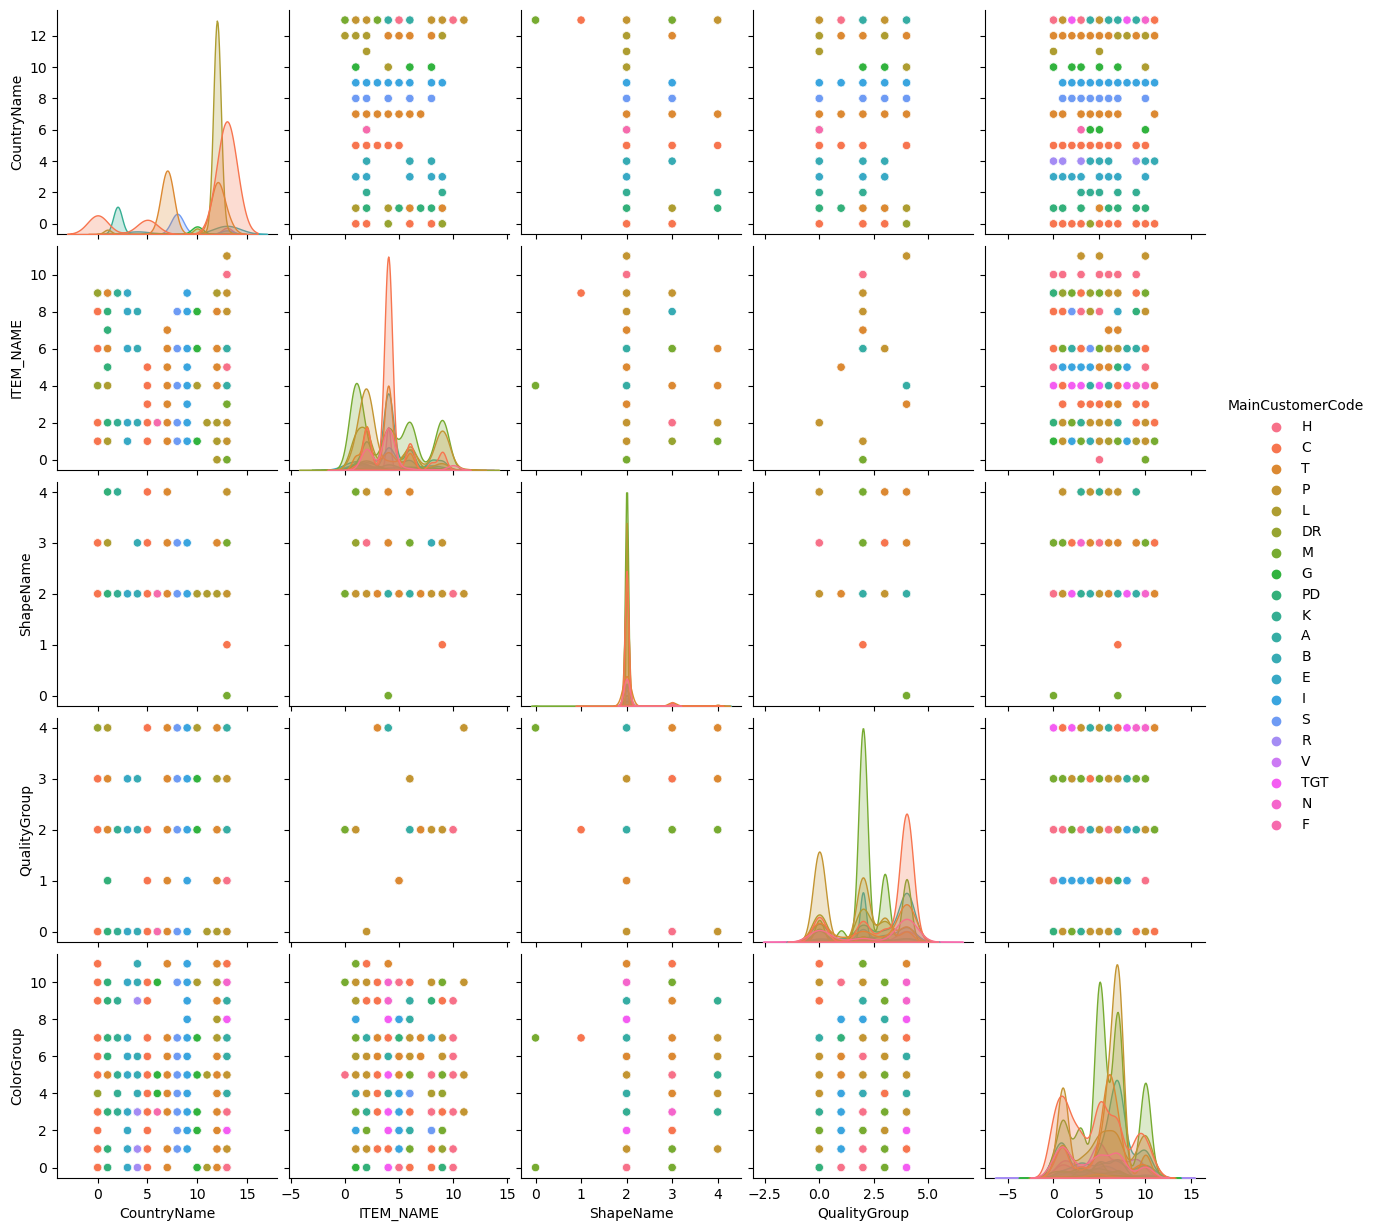

In [81]:
sns.pairplot(df4,hue='MainCustomerCode',vars=['CountryName','ITEM_NAME','ShapeName','QualityGroup','ColorGroup'])
plt.savefig('pairplot34.png')
plt.show()

##### Removing Shape Name because of the imbalance

#### Finding Outliers and remove them

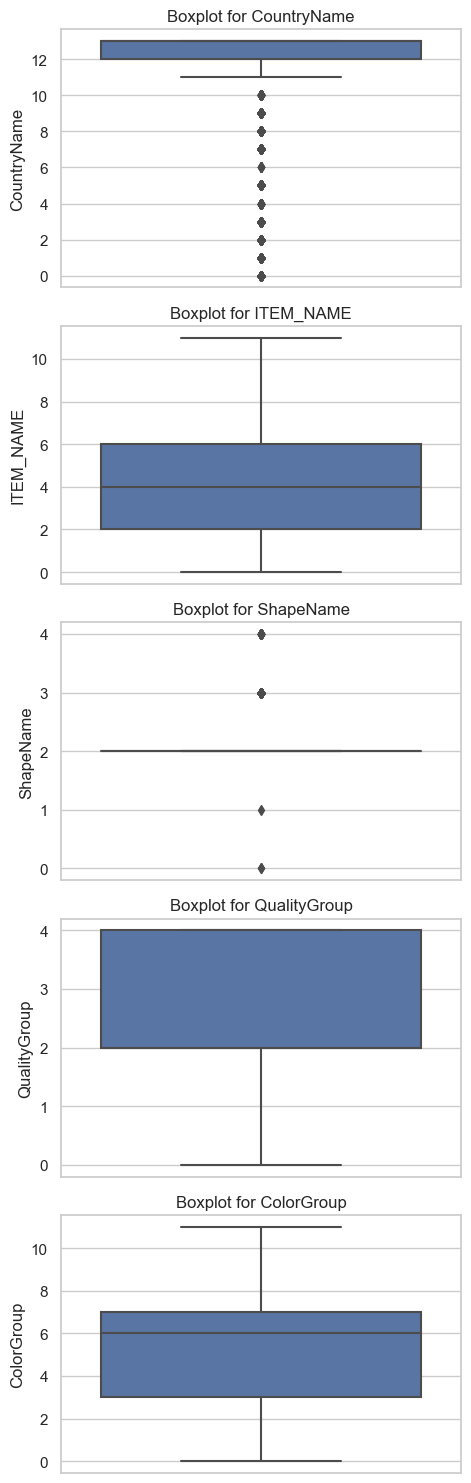

In [83]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the features for which you want to draw boxplots
outlier_features = ['CountryName','ITEM_NAME','ShapeName','QualityGroup','ColorGroup']

# Create subplots
fig, axes = plt.subplots(nrows=len(outlier_features), ncols=1, figsize=(5, 15))

# Draw boxplots for each feature
for i, feature in enumerate(outlier_features):
    sns.boxplot(y=df4[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [84]:
# Assuming dfn4 is your DataFrame
# Calculate the IQR for 'ShapeName_freq_encoded'
Q1 = df4['ShapeName'].quantile(0.25)
Q3 = df4['ShapeName'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df4_no_outliers = df4[(df4['ShapeName'] >= lower_bound) & (df4['ShapeName'] <= upper_bound)]



In [85]:
# Assuming dfn4 is your DataFrame
# Calculate the IQR for 'ShapeName_freq_encoded'
Q1 = df4_no_outliers['CountryName'].quantile(0.25)
Q3 = df4_no_outliers['CountryName'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df4_no_outliers1 = df4_no_outliers[(df4_no_outliers['CountryName'] >= lower_bound) & (df4_no_outliers['CountryName'] <= upper_bound)]

In [86]:
df4_no_outliers1.to_csv('finalorder-nooutliers.csv', index=False)
df5=pd.read_csv('finalorder-nooutliers.csv')

In [87]:
df5.columns

Index(['CountryName', 'QtyRequired', 'TotalArea', 'Amount', 'ITEM_NAME',
       'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'AreaFt',
       'AreaMtr', 'MainCustomerCode', 'MainQuality', 'QualityGroup',
       'MainDesign', 'MainColor', 'ColorGroup'],
      dtype='object')

In [90]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10507 entries, 0 to 10506
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountryName       10507 non-null  int64  
 1   QtyRequired       10507 non-null  int64  
 2   TotalArea         10507 non-null  float64
 3   Amount            10507 non-null  float64
 4   ITEM_NAME         10507 non-null  int64  
 5   QualityName       10507 non-null  object 
 6   DesignName        10507 non-null  object 
 7   ColorName         10507 non-null  object 
 8   ShapeName         10507 non-null  int64  
 9   AreaFt            10507 non-null  float64
 10  AreaMtr           10507 non-null  float64
 11  MainCustomerCode  10507 non-null  object 
 12  MainQuality       10507 non-null  object 
 13  QualityGroup      10507 non-null  int64  
 14  MainDesign        10507 non-null  int64  
 15  MainColor         10507 non-null  object 
 16  ColorGroup        10507 non-null  int64 

#### Classification Models

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target variable
X = df5[['CountryName', 'QtyRequired','ITEM_NAME','ShapeName', 'QualityGroup',
         'MainDesign', 'ColorGroup']]
y = df5['MainCustomerCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the results
print("Decision Tree - Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree - Test Accuracy:", dt_accuracy)
print("\nRandom Forest - Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest - Test Accuracy:", rf_accuracy)
print("\nKNN - Cross-Validation Accuracy Scores:", knn_scores)
print("KNN - Test Accuracy:", knn_accuracy)


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree - Cross-Validation Accuracy Scores: [0.95002974 0.94705532 0.93932183 0.92742415 0.94289114]
Decision Tree - Test Accuracy: 0.950523311132255

Random Forest - Cross-Validation Accuracy Scores: [0.9369423  0.94289114 0.93932183 0.93158834 0.93515764]
Random Forest - Test Accuracy: 0.9419600380589914

KNN - Cross-Validation Accuracy Scores: [0.90124926 0.89411065 0.89827484 0.89470553 0.89173111]
KNN - Test Accuracy: 0.8920076117982874


#### Improving the model
- Analyzing Classes
- As we have imbalance data, we need to use some methods to handle the classes, we used SMOTE for classes more than 3% of balance ratio

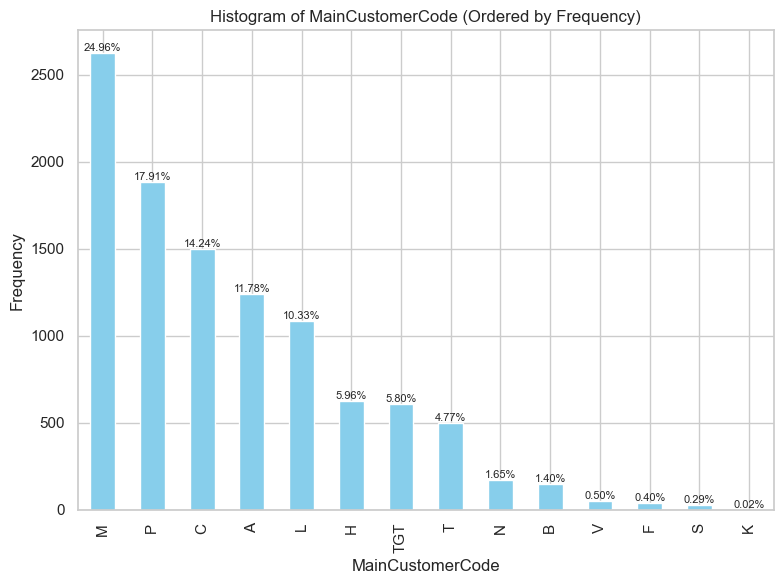

In [93]:
import matplotlib.pyplot as plt

# Assuming dfn5 is your DataFrame
plt.figure(figsize=(8, 6))

# Calculate the frequencies of MainCustomerCode
main_customer_code_frequencies = df5['MainCustomerCode'].value_counts().sort_values(ascending=False)

# Plot the histogram
main_customer_code_frequencies.plot(kind='bar', color='skyblue')

# Display the percentage on each bar
total_records = len(df5['MainCustomerCode'])
for i, count in enumerate(main_customer_code_frequencies):
    percentage = count / total_records * 100
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Histogram of MainCustomerCode (Ordered by Frequency)')
plt.xlabel('MainCustomerCode')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [95]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df5' is your DataFrame
# Assuming 'MainCustomerCode' is your target variable

# Step 1: Separate features and target variable
X = df5[['CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'QualityGroup', 'MainDesign', 'ColorGroup']]
y = df5['MainCustomerCode']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the specified classes
smote_classes = ['C', 'M', 'P', 'A', 'T', 'L', 'H', 'TGT']
sampling_strategy = {cls: max(y_train.value_counts()) for cls in smote_classes}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Continue with the rest of your code (Steps 4 to 7)
# Step 4: Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Evaluate Decision Tree model
evaluate_model(dt_model, X_test, y_test)

# Evaluate KNN model
evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.9410085632730733
Classification Report:
              precision    recall  f1-score   support

           A       0.92      0.97      0.94       238
           B       0.81      0.68      0.74        31
           C       0.96      0.97      0.97       304
           F       1.00      0.75      0.86         8
           H       0.86      0.85      0.86       134
           K       1.00      1.00      1.00         1
           L       0.96      0.96      0.96       223
           M       0.97      0.94      0.95       541
           N       0.84      0.84      0.84        32
           P       0.93      0.97      0.95       359
           S       1.00      0.75      0.86         8
           T       0.91      0.86      0.88        97
         TGT       0.98      0.99      0.99       116
           V       0.73      0.80      0.76        10

    accuracy                           0.94      2102
   macro avg       0.92      0.88      0.90      210

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metr

##### Finding the importance of features

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\s

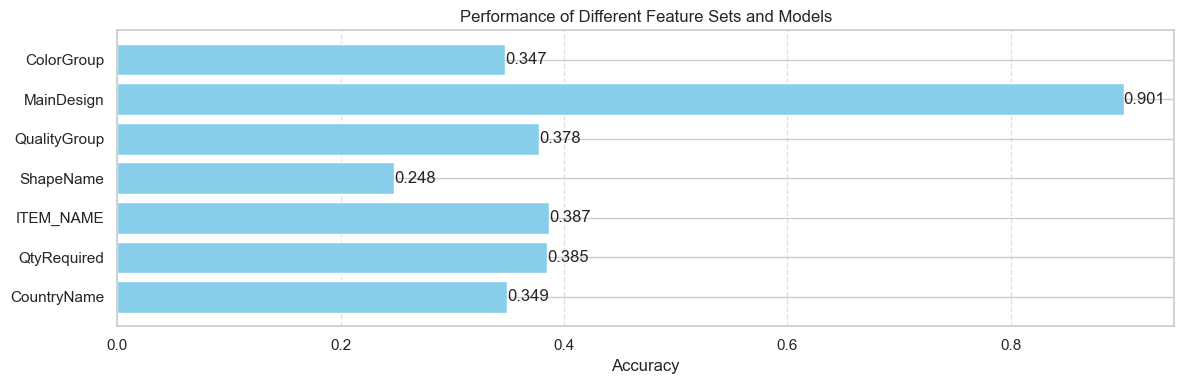

In [98]:
feature_sets =[['CountryName'], ['QtyRequired'], ['ITEM_NAME'],[ 'ShapeName'], ['QualityGroup'],
               ['MainDesign'], ['ColorGroup']]

# Define hyperparameters (replace with your specific hyperparameter values)
hyperparameters = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Define lists to store results
feature_set_names = []  # Names of feature sets
accuracy_scores = []    # Accuracy scores for each try

# Assume you have X_train, y_train defined

# Iterate over feature sets
for features in feature_sets:
    X_train_subset = X_train[features]
    
    # Iterate over hyperparameters
    clf = DecisionTreeClassifier(**hyperparameters)
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(clf, X_train_subset, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
        
    # Store the results
    feature_set_names.append(', '.join(features))
    accuracy_scores.append(mean_score)

# Create a bar chart to visualize the results
plt.figure(figsize=(12, 4))
bars = plt.barh(feature_set_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Performance of Different Feature Sets and Models')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add text annotations
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center')

plt.tight_layout()

# Show the plot
plt.show()

##### Running classification models with features with more than 38% of importance

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df5' is your DataFrame
# Assuming 'MainCustomerCode' is your target variable

# Step 1: Separate features and target variable
X = df5[[ 'QtyRequired', 'ITEM_NAME', 'QualityGroup', 'MainDesign']]
y = df5['MainCustomerCode']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the specified classes
smote_classes = ['C', 'M', 'P', 'A', 'T', 'L', 'H', 'TGT']
sampling_strategy = {cls: max(y_train.value_counts()) for cls in smote_classes}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Continue with the rest of your code (Steps 4 to 7)
# Step 4: Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Evaluate Decision Tree model
evaluate_model(dt_model, X_test, y_test)

# Evaluate KNN model
evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.9062797335870599
Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.87      0.90       238
           B       0.90      0.58      0.71        31
           C       0.96      0.95      0.95       304
           F       1.00      0.62      0.77         8
           H       0.87      0.88      0.88       134
           K       1.00      1.00      1.00         1
           L       0.80      0.89      0.84       223
           M       0.92      0.94      0.93       541
           N       0.93      0.84      0.89        32
           P       0.94      0.93      0.93       359
           S       1.00      0.50      0.67         8
           T       0.73      0.79      0.76        97
         TGT       0.98      0.99      0.99       116
           V       0.73      0.80      0.76        10

    accuracy                           0.91      2102
   macro avg       0.91      0.83      0.85      210

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metr

### Clustering

In [100]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df5[['CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'QualityGroup', 'MainDesign', 'ColorGroup']]


# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 8

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
df5['Cluster'] = clusters

# Display the results
print(df5[['MainCustomerCode', 'Cluster']])


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      MainCustomerCode  Cluster
0                    H        4
1                    H        7
2                    H        4
3                    H        4
4                    H        7
...                ...      ...
10502                P        1
10503                P        1
10504                P        1
10505                P        1
10506                P        1

[10507 rows x 2 columns]


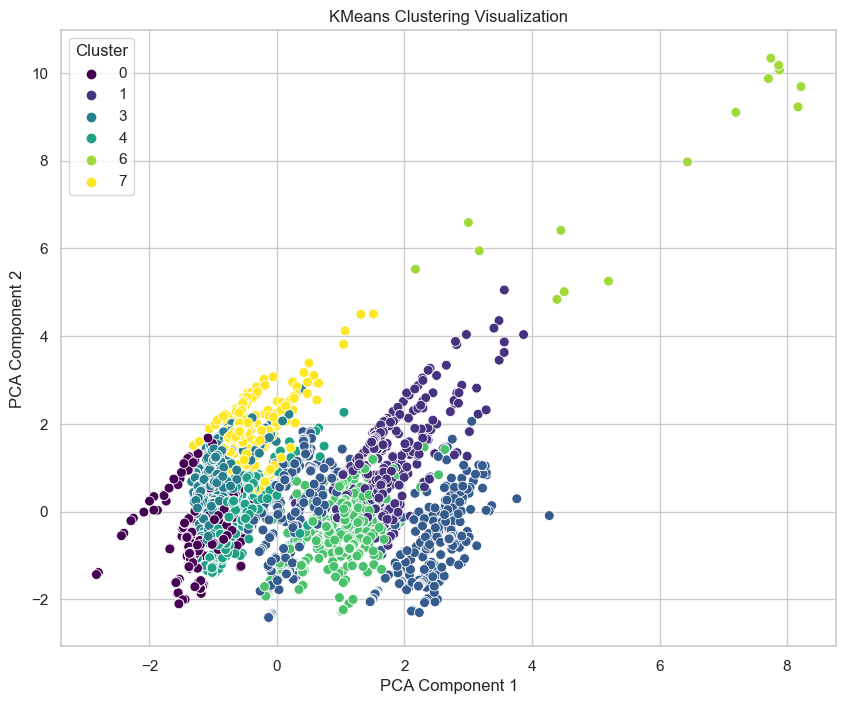

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Add PCA components to the DataFrame
df5['PCA1'] = features_pca[:, 0]
df5['PCA2'] = features_pca[:, 1]

# Plot clusters using scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df5, palette='viridis', s=50)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [103]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.34


#### Finding the best K

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\clust

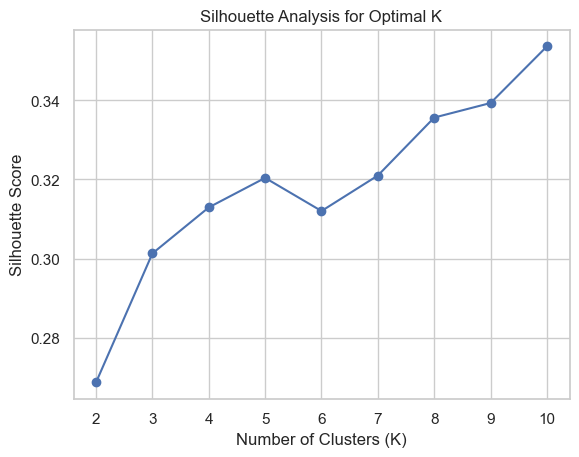

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming features_standardized contains your standardized features
# You may need to replace it with the appropriate variable in your code
features_standardized = scaler.fit_transform(X)

# Set a range of K values to try
k_values = range(2, 11)  # You can adjust the range based on your dataset

# Store silhouette scores for each K
silhouette_scores = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_standardized)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_standardized, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


#### Run The model for k10

In [105]:
X = df5[['CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'QualityGroup', 'MainDesign', 'ColorGroup']]


# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
df5['Cluster'] = clusters

# Display the results
print(df5[['MainCustomerCode', 'Cluster']])

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      MainCustomerCode  Cluster
0                    H        3
1                    H        9
2                    H        3
3                    H        3
4                    H        9
...                ...      ...
10502                P        2
10503                P        2
10504                P        2
10505                P        2
10506                P        2

[10507 rows x 2 columns]


In [106]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.35


### Neural Network

In [107]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [108]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Assuming dfn5 is your DataFrame

X = df5[['CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'QualityGroup', 'MainDesign', 'ColorGroup']]
y = df5['MainCustomerCode']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_categorical, epochs=10, validation_data=(X_test_scaled, y_test_categorical), verbose=2)

# Make predictions
y_pred_categorical = model.predict(X_test_scaled)
y_pred = tf.argmax(y_pred_categorical, axis=1)

# Convert predictions to the same data type as y_test (integer)
y_pred_labels = y_pred.numpy()

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_labels))





Epoch 1/10


263/263 - 2s - loss: 1.6735 - accuracy: 0.4716 - val_loss: 1.3099 - val_accuracy: 0.5928 - 2s/epoch - 8ms/step
Epoch 2/10
263/263 - 1s - loss: 1.2252 - accuracy: 0.5898 - val_loss: 1.2038 - val_accuracy: 0.6246 - 613ms/epoch - 2ms/step
Epoch 3/10
263/263 - 1s - loss: 1.1467 - accuracy: 0.6198 - val_loss: 1.1522 - val_accuracy: 0.6356 - 635ms/epoch - 2ms/step
Epoch 4/10
263/263 - 1s - loss: 1.0968 - accuracy: 0.6413 - val_loss: 1.1055 - val_accuracy: 0.6522 - 612ms/epoch - 2ms/step
Epoch 5/10
263/263 - 1s - loss: 1.0553 - accuracy: 0.6570 - val_loss: 1.0725 - val_accuracy: 0.6598 - 640ms/epoch - 2ms/step
Epoch 6/10
263/263 - 1s - loss: 1.0212 - accuracy: 0.6676 - val_loss: 1.0465 - val_accuracy: 0.6598 - 619ms/epoch - 2ms/step
Epoch 7/10
263/263 - 1s - loss: 0.9876 - accuracy: 0.6764 - val_loss: 1.0142 - val_accuracy: 0.6717 - 656ms/epoch - 2ms/step
Epoch 8/10
263/263 - 1s - loss: 0.9617 - accuracy: 0.6855 - val_loss: 0.9946 - val_accuracy: 0.6836 - 655ms/epoch - 2ms/ste

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
